# Visualization Code for Figure 2(b)
- Figure 2(b shows the spectral responses of SASRec, DuoRec, FMLPRec, and BSARec ($A$ and $A_{IB}$).
    - For SASRec, DuoRec, and BSARec ($A$), we visualize the spectral responses of the self-attention matrices.
    - For FMLPRec, we visualize the spectral responses of the filter layer.
- This code provides visualization functions for SASRec and FMLPRec, which can be adapted for use with other models.

## 0. Import Modules

In [1]:
import os
import scipy
import torch
import numpy as np
from scipy.linalg import dft
import matplotlib.pyplot as plt

## 1. FFTShift

- **Goal:** Rearrange the output of the Fast Fourier Transform (FFT) to center the zero-frequency component. 

In [2]:
def fftshift(arr, n=50):
    
    freq = scipy.fft.rfftfreq(50)
    x = np.concatenate([np.flip(-freq[1:]), freq])
    y = np.concatenate([np.flip(arr[1:]), arr])

    return x, y

## 2. Spectral Responses of Self-Attention Matrix in SASRec

- **What you need:**
    - `Attention Matrix`: The attention matrix after applying the softmax function. In this code, we use an attention matrix with the shape (batch, n_heads, N, N), where N is the maximum sequence length (50).
    - **How to obtain**: Simply save the attention matrix during evaluation.
- **How to calculate:**
    - We follow the procedure outlined in Appendix F.2 of the paper *Anti-Oversmoothing in Deep Vision Transformers via the Fourier Domain Analysis: From Theory to Practice* (ICLR 2022).
    - By treating the attention matrix $A$ as a linear filter, its Fourier-domain response can be represented by another linear kernel, $\Lambda = F A F^{-1}$, where $F$ is the Fourier transform matrix.

In [3]:
file_path = 'sequence_output/LastFM_Spectral_Response/SASRec_attention_weight.npy'
attention_matrix = np.load(file_path)

dft_matrix = dft(50)
idft_matrix = np.linalg.inv(dft_matrix)

index = 75
head = 0
attention = attention_matrix[index, head]
sasrec_filter = dft_matrix @ attention @ idft_matrix

sasrec_filter = np.abs(sasrec_filter.mean(axis=1)[:26])

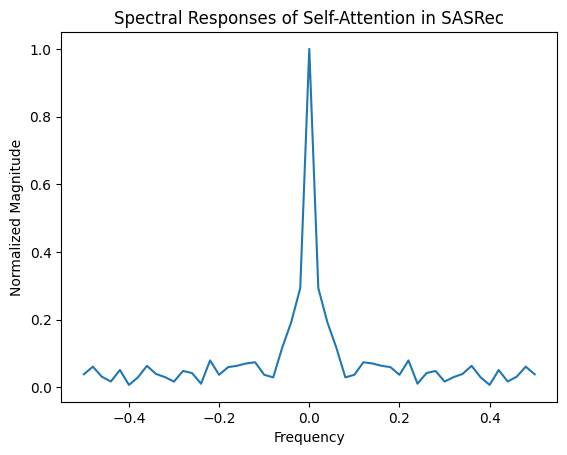

In [4]:
x, sasrec_shifted_filter = fftshift(sasrec_filter)
plt.title('Spectral Responses of Self-Attention in SASRec')
plt.xlabel('Frequency')
plt.ylabel('Normalized Magnitude')
plt.plot(x, sasrec_shifted_filter / sasrec_shifted_filter.max())
plt.show()

## 3. Spectral Responses of Filter Layer in FMLPRec

- **Requirements:**
    - `Complex Weight`: The complex weight values (`self.complex_weight` as `nn.Parameter`) in `FMLPRecLayer`.
    - **How to Obtain**: Simply save the values of trained `self.complex_weight`.
- **Calculation Steps:**
    - Calculate the magnitude by finding $a^2 + b^2$ for each complex weight $z = a + bi$ in `self.complex_weight`.

In [5]:
file_path = 'sequence_output/LastFM_Spectral_Response/FMLPRec_complex_weight.npy'
complex_weight_layer = np.load(file_path)[0]

filter_real = complex_weight_layer[:,:,0]
filter_imaginary = complex_weight_layer[:,:,1]
filter_abs = filter_real**2 + filter_imaginary**2

fmlprec_filter = filter_abs.mean(axis=1)

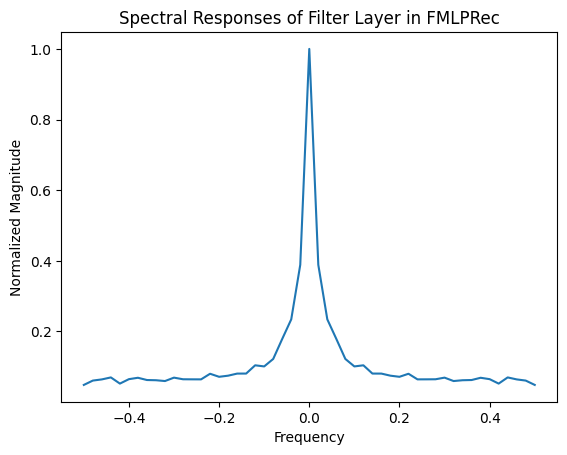

In [6]:
x, fmlprec_shifted_filter = fftshift(fmlprec_filter)
plt.title('Spectral Responses of Filter Layer in FMLPRec')
plt.xlabel('Frequency')
plt.ylabel('Normalized Magnitude')
plt.plot(x, fmlprec_shifted_filter / fmlprec_shifted_filter.max())
plt.show()